# Delayed Shipments - Data Science Proyect

## Install the neccesary libraries

In [2]:
#!pip install pandas
#!pip install xlrd
#!pip install openpyxl
#!pip install matplotlib
#!pip install numpy
#!pip install seaborn
#!pip install sklearn
#!pip install keras
#!pip install tensorflow
#!pip install imbalanced-learn
#!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import tensorflow as tf
import keras
import sklearn
import imblearn

## Import the DB

In [4]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('DataScience - DB (CSV).csv')

Saving DataScience - DB (CSV).csv to DataScience - DB (CSV) (1).csv


In [5]:
display(df)

,carrier_code,dia_semana_despachado,cross_or_ff,validacion_tel,cumplimiento
0,shipnow,2,0,1,0
1,shipnow,3,1,1,0
2,shipnow,3,1,1,0
3,shipnow,2,1,1,0
4,shipnow,3,1,1,0
...,...,...,...,...,...
62667,shipnow,2,0,1,0
62668,shipnow,2,0,1,0
62669,shipnow,2,1,1,0
62670,shipnow,2,1,1,0


## BUILDING THE MODEL

https://www.youtube.com/watch?v=iYie42M1ZyU&ab_channel=PyData

### 1er Paso: Research the Structure

In [6]:
display(
    df.info(),
    df.isnull().sum(),
    df.describe(),
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62672 entries, 0 to 62671
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   carrier_code           62672 non-null  object
 1   dia_semana_despachado  62672 non-null  int64 
 2   cross_or_ff            62672 non-null  int64 
 3   validacion_tel         62672 non-null  int64 
 4   cumplimiento           62672 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ MB


None

carrier_code             0
dia_semana_despachado    0
cross_or_ff              0
validacion_tel           0
cumplimiento             0
dtype: int64

,dia_semana_despachado,cross_or_ff,validacion_tel,cumplimiento
count,62672.000000,62672.000000,62672.000000,62672.000000
mean,2.682921,0.632579,0.977965,0.071659
std,1.603911,0.482106,0.146800,0.257924
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,3.000000,1.000000,1.000000,0.000000
75%,4.000000,1.000000,1.000000,0.000000
max,6.000000,1.000000,1.000000,1.000000


### 2do Paso: Coding Categorical Info

,carrier_code,dia_semana_despachado,cross_or_ff,validacion_tel,cumplimiento
0,shipnow,2,0,1,0
1,shipnow,3,1,1,0
2,shipnow,3,1,1,0
3,shipnow,2,1,1,0
4,shipnow,3,1,1,0


,carrier_code_bmba,carrier_code_iflow,carrier_code_oca,carrier_code_shipnow,dia_semana_despachado_0,dia_semana_despachado_1,dia_semana_despachado_2,dia_semana_despachado_3,dia_semana_despachado_4,dia_semana_despachado_5,dia_semana_despachado_6
0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
62667,0,0,0,1,0,0,1,0,0,0,0
62668,0,0,0,1,0,0,1,0,0,0,0
62669,0,0,0,1,0,0,1,0,0,0,0
62670,0,0,0,1,0,0,1,0,0,0,0


,carrier_code_bmba,carrier_code_iflow,carrier_code_oca,carrier_code_shipnow,dia_semana_despachado_0,dia_semana_despachado_1,dia_semana_despachado_2,dia_semana_despachado_3,dia_semana_despachado_4,dia_semana_despachado_5,dia_semana_despachado_6,cross_or_ff,validacion_tel,cumplimiento
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,1,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62667,0,0,0,1,0,0,1,0,0,0,0,0,1,0
62668,0,0,0,1,0,0,1,0,0,0,0,0,1,0
62669,0,0,0,1,0,0,1,0,0,0,0,1,1,0
62670,0,0,0,1,0,0,1,0,0,0,0,1,1,0


       carrier_code_bmba  carrier_code_iflow  ...  cross_or_ff  validacion_tel
0                      0                   0  ...            0               1
1                      0                   0  ...            1               1
2                      0                   0  ...            1               1
3                      0                   0  ...            1               1
4                      0                   0  ...            1               1
...                  ...                 ...  ...          ...             ...
62667                  0                   0  ...            0               1
62668                  0                   0  ...            0               1
62669                  0                   0  ...            1               1
62670                  0                   0  ...            1               1
62671                  0                   0  ...            1               1

[62672 rows x 13 columns] 0        0
1        0
2  

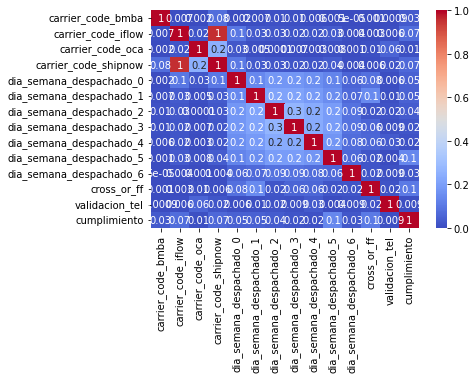

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

display(df.head())
df2 = df[['carrier_code','dia_semana_despachado']]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df2)
enc.categories_

df3 = pd.DataFrame(enc.transform(df2).toarray())
df3.columns = enc.get_feature_names_out()
for columns in df3.columns:
  df3[[columns]] = df3[[columns]].astype(int)

display(df3)

df4 = pd.concat([df3,df[['cross_or_ff','validacion_tel','cumplimiento']]], axis=1)
display(df4)

corr_matrix = df4.corr().abs()
sns.heatmap(corr_matrix, annot=True, fmt='.1g',vmin=0, vmax=1, center= 0.5, cmap='coolwarm')

X = df4.drop(['cumplimiento'], axis=1)
y = df4['cumplimiento']

print(X,y)

In [106]:
corr_matrix

,carrier_code_bmba,carrier_code_iflow,carrier_code_oca,carrier_code_shipnow,dia_semana_despachado_0,dia_semana_despachado_1,dia_semana_despachado_2,dia_semana_despachado_3,dia_semana_despachado_4,dia_semana_despachado_5,dia_semana_despachado_6,cross_or_ff,validacion_tel,cumplimiento
carrier_code_bmba,1.000000,0.007217,0.001987,0.082355,0.009224,0.023604,0.015456,0.017072,0.002876,0.008510,0.001709,0.004780,0.004920,0.004566
carrier_code_iflow,0.007217,1.000000,0.023029,0.954350,0.106888,0.022138,0.028239,0.013300,0.031879,0.032125,0.215423,0.014115,0.017082,0.071099
carrier_code_oca,0.001987,0.023029,1.000000,0.262801,0.029434,0.010709,0.018205,0.024944,0.001242,0.030774,0.023394,0.007265,0.015380,0.047418
carrier_code_shipnow,0.082355,0.954350,0.262801,1.000000,0.112001,0.016112,0.033733,0.021435,0.031267,0.038900,0.213660,0.015215,0.012482,0.054436
dia_semana_despachado_0,0.009224,0.106888,0.029434,0.112001,1.000000,0.120558,0.156731,0.252863,0.186882,0.126041,0.025312,0.122182,0.021663,0.045961
dia_semana_despachado_1,0.023604,0.022138,0.010709,0.016112,0.120558,1.000000,0.138308,0.223140,0.164915,0.111225,0.022337,0.218329,0.028158,0.079899
dia_semana_despachado_2,0.015456,0.028239,0.018205,0.033733,0.156731,0.138308,1.000000,0.290093,0.214397,0.144598,0.029039,0.034572,0.034564,0.086915
dia_semana_despachado_3,0.017072,0.013300,0.024944,0.021435,0.252863,0.223140,0.290093,1.000000,0.345898,0.233287,0.046850,0.079683,0.025202,0.189123
dia_semana_despachado_4,0.002876,0.031879,0.001242,0.031267,0.186882,0.164915,0.214397,0.345898,1.000000,0.172415,0.034625,0.003974,0.000946,0.021144
dia_semana_despachado_5,0.008510,0.032125,0.030774,0.038900,0.126041,0.111225,0.144598,0.233287,0.172415,1.000000,0.023352,0.013523,0.006567,0.083693


### 3er Paso: Balancing Data

Can't use Accuracy as as a valid parameter in inbalanced Data. We use f1 score, we look for high precision and high recall.

*Information on Balancing:*

https://www.youtube.com/watch?v=X9MZtvvQDR4&ab_channel=PyData

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

https://www.youtube.com/watch?v=6M2d2n-QXCc

*Code Over, Under and Over-Under Sampling:*

https://www.youtube.com/watch?v=L7Xj9dRfSKk&t=266s&ab_channel=DecisionForest

**

https://www.youtube.com/watch?v=L_dQrZZjGDg&ab_channel=DataTalksDataTalks

¿Necesitamos balancear?

In [41]:
from collections import Counter

counter = Counter(y)
for k,v in counter.items():
  dist = v / len(y) *100
  print(f"Class={k}, n={v} ({dist} %)")

Class=0, n=58181 (92.83412050038294 %)
Class=1, n=4491 (7.165879499617053 %)


Un toque desbalanceado ¿No les parece?

***Ensemble:*** Dividis la clase mayoritaria en partes y comparas esas partes con la clase minoritaria en distintos

 ***Synthetic Minority Oversampling:*** Se eliminan datos de la clase mayoritaria para balancear la relacion

In [9]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_SMO , y_SMO = oversample.fit_resample(X,y)

from collections import Counter

counter = Counter(y_SMO)
for k,v in counter.items():
  dist = v / len(y_SMO) *100
  print(f"Class={k}, n={v} ({dist} %)")

Class=0, n=58181 (50.0 %)
Class=1, n=58181 (50.0 %)


***Undersampling:*** Se eliminan datos de la clase mayoritaria para balancear la relacion

In [10]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_Und , y_Und = undersample.fit_resample(X,y)

counter = Counter(y_Und)
for k,v in counter.items():
  dist = v / len(y_Und) *100
  print(f"Class={k}, n={v} ({dist} %)")

Class=0, n=4491 (50.0 %)
Class=1, n=4491 (50.0 %)


***Under & SMO Sampling:*** Se eliminan datos de la clase mayoritaria y se duplican los de la clase menor

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample),("u", undersample)]
pipeline = Pipeline(steps=steps)

X_OU , y_OU = pipeline.fit_resample(X,y)

counter = Counter(y_OU)
for k,v in counter.items():
  dist = v / len(y_OU) *100
  print(f"Class={k}, n={v} ({dist} %)")

Class=0, n=58181 (50.0 %)
Class=1, n=58181 (50.0 %)


### 4to Paso: Definir X_train, y_train, X_test, y_test

In [43]:
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [82]:
#Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_OU,y_OU,test_size=0.2, random_state=42) #Cambiar X,y por cualquiera de los sistemas de balanceo que usamos

#Scaling the data
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

X_train2 = []
X_test2 = []

for vector in X_train:
  X_train2.append(vector.astype(int))

X_train2 = np.array(X_train2)
X_train = X_train2

for vector in X_test:
  X_test2.append(vector.astype(int))

X_test2 = np.array(X_test2)
X_test = X_test2

## TESTING MODELS

Explicacion metricas de medicion Machine Learning

https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### Support Vector Machine

In [14]:
from sklearn import svm

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     11790
           1       0.68      0.60      0.64     11483

    accuracy                           0.66     23273
   macro avg       0.66      0.66      0.66     23273
weighted avg       0.66      0.66      0.66     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


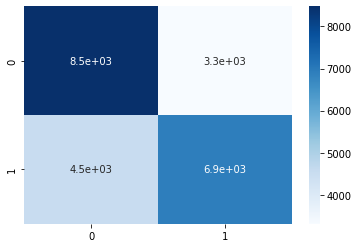

In [162]:
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'),)

##### Random Forest

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     11790
           1       0.68      0.60      0.64     11483

    accuracy                           0.66     23273
   macro avg       0.66      0.66      0.66     23273
weighted avg       0.66      0.66      0.66     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


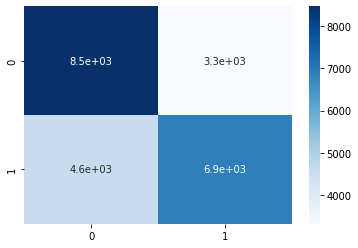

In [91]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='f1', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Artificial Neural Network

https://stackoverflow.com/questions/53354176/how-to-use-f-score-as-error-function-to-train-neural-networks



Epoch 1/150
9309/9309 [==============================] - 29s 3ms/step - loss: 0.6393 - accuracy: 0.6285
Epoch 2/150
9309/9309 [==============================] - 17s 2ms/step - loss: 0.6201 - accuracy: 0.6481
Epoch 3/150
9309/9309 [==============================] - 15s 2ms/step - loss: 0.6175 - accuracy: 0.6520
Epoch 4/150
9309/9309 [==============================] - 16s 2ms/step - loss: 0.6165 - accuracy: 0.6523
Epoch 5/150
9309/9309 [==============================] - 17s 2ms/step - loss: 0.6157 - accuracy: 0.6522
Epoch 6/150
9309/9309 [==============================] - 16s 2ms/step - loss: 0.6156 - accuracy: 0.6520
Epoch 7/150
9309/9309 [==============================] - 15s 2ms/step - loss: 0.6153 - accuracy: 0.6516
Epoch 8/150
9309/9309 [==============================] - 16s 2ms/step - loss: 0.6152 - accuracy: 0.6521
Epoch 9/150
9309/9309 [==============================] - 16s 2ms/step - loss: 0.6148 - accuracy: 0.6522
Epoch 10/150
9309/9309 [==============================] - 16s 2m

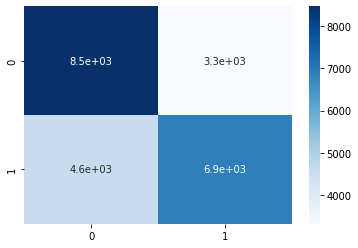

In [93]:
from keras import metrics  
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import fbeta_score

train_data = tf.data.Dataset.from_tensor_slices((y_train, X_train))
valid_data = tf.data.Dataset.from_tensor_slices((y_train, X_train))

ann = Sequential()
ann.add(Dense(10,input_dim=13,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

ann.compile(loss="binary_crossentropy", optimizer='SGD',metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=150, batch_size=10)

predictions = (ann.predict(X_test) > 0.5)
print(classification_report(y_test,predictions),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Nearest_Neighbors

              precision    recall  f1-score   support

           0       0.56      0.77      0.65     11790
           1       0.61      0.37      0.46     11483

    accuracy                           0.57     23273
   macro avg       0.59      0.57      0.55     23273
weighted avg       0.58      0.57      0.55     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


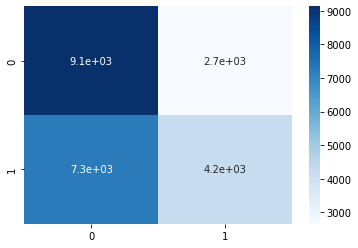

In [15]:
from sklearn.neighbors import KNeighborsClassifier

NN_model = KNeighborsClassifier(3).fit(X_train,y_train)
y_pred=NN_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Linear_SVC

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     11790
           1       0.65      0.53      0.59     11483

    accuracy                           0.63     23273
   macro avg       0.64      0.63      0.63     23273
weighted avg       0.63      0.63      0.63     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


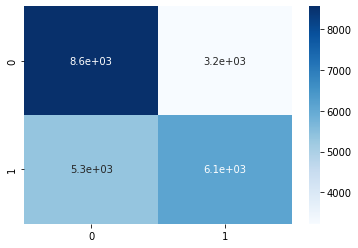

In [16]:
from sklearn.svm import SVC

LSVC_model = SVC(kernel="linear", C=0.025).fit(X_train,y_train)
y_pred=LSVC_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Polynomial_SVC

              precision    recall  f1-score   support

           0       0.64      0.72      0.68     11790
           1       0.67      0.59      0.63     11483

    accuracy                           0.66     23273
   macro avg       0.66      0.66      0.65     23273
weighted avg       0.66      0.66      0.65     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


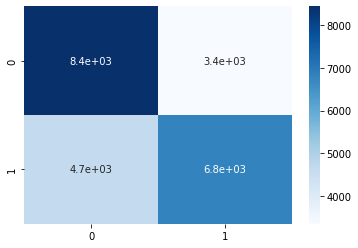

In [17]:
PSVC_model = SVC(kernel="poly", degree=3, C=0.025).fit(X_train,y_train)
y_pred=PSVC_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### RBF_SVM

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     11790
           1       0.67      0.60      0.63     11483

    accuracy                           0.66     23273
   macro avg       0.66      0.66      0.66     23273
weighted avg       0.66      0.66      0.66     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


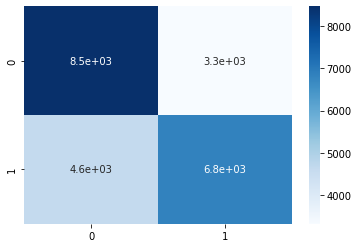

In [18]:
from sklearn.gaussian_process.kernels import RBF

RBF_SVM_model = SVC(kernel="rbf", C=1, gamma=2).fit(X_train,y_train)
y_pred=RBF_SVM_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Gaussian_Process

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

GP_model = GaussianProcessClassifier(1.0 * RBF(1.0)).fit(X_train,y_train)
y_pred=GP_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Gradient_Boosting

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     11790
           1       0.67      0.60      0.63     11483

    accuracy                           0.65     23273
   macro avg       0.66      0.65      0.65     23273
weighted avg       0.66      0.65      0.65     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


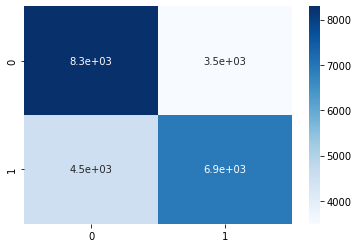

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0).fit(X_train,y_train)
y_pred=GB_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Decision_Tree

              precision    recall  f1-score   support

           0       0.65      0.62      0.63     11790
           1       0.63      0.66      0.64     11483

    accuracy                           0.64     23273
   macro avg       0.64      0.64      0.64     23273
weighted avg       0.64      0.64      0.64     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


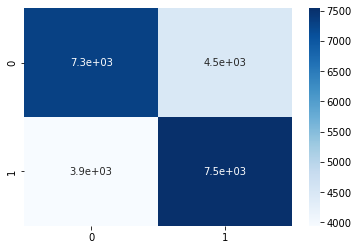

In [20]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
y_pred=DT_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Extra_Trees

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     11790
           1       0.67      0.60      0.63     11483

    accuracy                           0.65     23273
   macro avg       0.66      0.65      0.65     23273
weighted avg       0.66      0.65      0.65     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


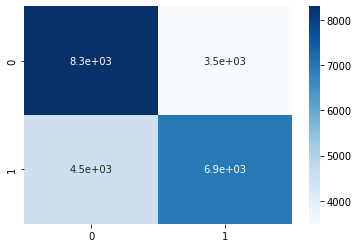

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

ET_model = ExtraTreesClassifier(n_estimators=10, min_samples_split=2).fit(X_train,y_train)
y_pred=ET_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Neural_Net

              precision    recall  f1-score   support

           0       0.64      0.70      0.67     11790
           1       0.66      0.60      0.63     11483

    accuracy                           0.65     23273
   macro avg       0.65      0.65      0.65     23273
weighted avg       0.65      0.65      0.65     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


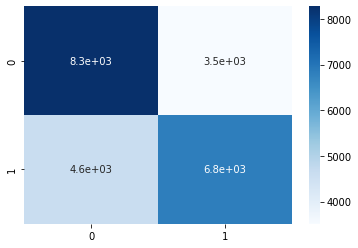

In [22]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier(alpha=1, max_iter=1000).fit(X_train,y_train)
y_pred=NN_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### AdaBoost

              precision    recall  f1-score   support

           0       0.64      0.70      0.67     11790
           1       0.66      0.60      0.63     11483

    accuracy                           0.65     23273
   macro avg       0.65      0.65      0.65     23273
weighted avg       0.65      0.65      0.65     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


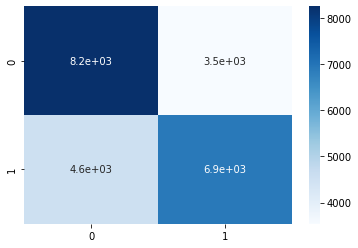

In [23]:
from sklearn.ensemble import AdaBoostClassifier

AB_model = AdaBoostClassifier(n_estimators=100).fit(X_train,y_train)
y_pred=AB_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### Naive_Bayes

              precision    recall  f1-score   support

           0       0.67      0.46      0.54     11790
           1       0.58      0.77      0.66     11483

    accuracy                           0.61     23273
   macro avg       0.63      0.62      0.60     23273
weighted avg       0.63      0.61      0.60     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


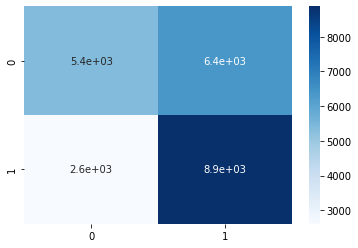

In [24]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB().fit(X_train,y_train)
y_pred=NB_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### QDA

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       0.51      1.00      0.67     11790
           1       0.93      0.01      0.01     11483

    accuracy                           0.51     23273
   macro avg       0.72      0.50      0.34     23273
weighted avg       0.72      0.51      0.35     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


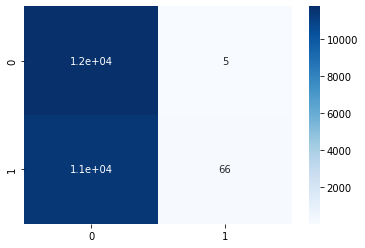

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA_model = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
y_pred=QDA_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

##### SGD

              precision    recall  f1-score   support

           0       0.61      0.73      0.67     11790
           1       0.65      0.53      0.59     11483

    accuracy                           0.63     23273
   macro avg       0.63      0.63      0.63     23273
weighted avg       0.63      0.63      0.63     23273
 AxesSubplot(0.125,0.125;0.62x0.755)


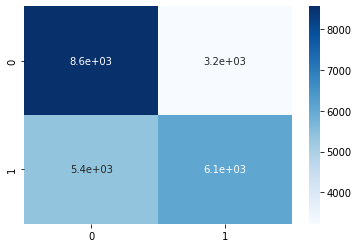

In [26]:
from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier(loss="hinge", penalty="l2").fit(X_train,y_train)
y_pred=SGD_model.predict(X_test)
print(classification_report(y_test,y_pred),sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap = 'Blues'))

## Prueba contra la realidad

Saving Datos de prueba.csv to Datos de prueba.csv


In [99]:
from google.colab import files
uploaded = files.upload()
df_R = pd.read_csv('Datos de prueba.csv')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

display(df.head())
df2_R = df_R[['carrier_code','dia_semana_despachado']]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df2_R)
enc.categories_

df3_R = pd.DataFrame(enc.transform(df2_R).toarray())
df3_R.columns = enc.get_feature_names_out()
for columns in df3_R.columns:
  df3_R[[columns]] = df3_R[[columns]].astype(int)

df4_R = pd.concat([df3_R,df_R[['cross_or_ff','validacion_tel','cumplimiento']]], axis=1)

X_R = df4_R.drop(['cumplimiento'], axis=1)
y_R = df4_R['cumplimiento']

,carrier_code,dia_semana_despachado,cross_or_ff,validacion_tel,cumplimiento
0,shipnow,3,1,1,0
1,iflow,3,1,1,0
2,shipnow,4,1,1,0
3,iflow,4,1,1,0
4,shipnow,4,1,1,0


              precision    recall  f1-score   support

           0       0.97      0.70      0.82     11872
           1       0.17      0.74      0.28       982

    accuracy                           0.71     12854
   macro avg       0.57      0.72      0.55     12854
weighted avg       0.91      0.71      0.78     12854
 AxesSubplot(0.125,0.125;0.62x0.755)


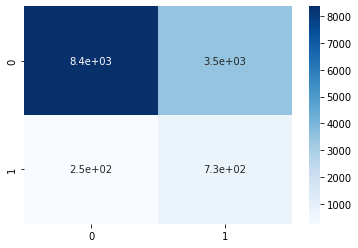

In [100]:
from sklearn.tree import DecisionTreeClassifier

y_pred_R = DT_model.predict(np.array(X_R))
print(classification_report(y_R,y_pred_R),sns.heatmap(confusion_matrix(y_R, y_pred_R),annot=True, cmap = 'Blues'))